# <center>Lecture 4: Maximum likelihood and logit</center>
## <center>Antoine Chapel (Sciences Po & PSE) </center>
## <center>Alfred Galichon's [math+econ+code](https://www.math-econ-code.org/) prerequisite class on numerical optimization and econometrics, in Python </center>
Class content by Antoine Chapel. Past and present support from Alfred Galichon's ERC grant CoG-866274 is acknowledged, as well as inputs from contributors listed [here](https://www.math-econ-code.org/team). If you reuse material from this class, please cite as:

Antoine Chapel, 'math+econ+code' prerequisite class on numerical optimization and econometrics, January 2023

#### References:

* Discrete Choice Methods with Simulation 2nd Ed, (Train, K) 2009
* Microeconometrics Methods and Applications, (Cameron, Trivedi), 2005

## Introduction and Outline

The Math+Econ+Code January masterclass is divided into an optimization-oriented part and an econometrics-oriented part. To understand well how to apply Optimal Transport to econometrics, some econometrics building blocks are absolutely essential, especially Logit theory. We will carefully study this topic to prepare you best.

First, we will discuss a bit of Maximum Likelihood which will be central to this class. As an application whose solution requires numerical methods, we will consider Poisson regression. Then, we will rederive step-by-step the logit estimation technique.

Across this lecture, we will make use of numerical examples in Python.

### Maximum Likelihood:
Econometrics start with a sample and some distributional assumption.
If you have the following sample: [81, 75, 100, 92, 64], what is the chance that it has been generated by a normal distribution of mean 10: $\mathcal{N}(10, 1)$ ? The chance is very low, actually close to 0. The chance/the **likelihood** that it has been generated by $\mathcal{N}(82, 1)$ is much higher. Maximum likelihood allows us to formalize this idea through an optimization process.


Let us start by finding a normal estimator through Maximum Likelihood, as a first example. You have a sample $y = \{y_i\}_{i=1}^N$ and make the assumption that it was generated by a normal random variable. What are the most likely parameters for a normal distribution to generate the sample you have ?

\begin{align}
f(y_i | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{ (y_i - \mu)^2 }{2\sigma^2}}
\end{align}

The likelihood function is equal to the joint density of the distribution:

\begin{align}
\mathcal{L} (\mu, \sigma^2 | y) = \prod_{i=1}^N  \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{ (y_i - \mu)^2 }{2\sigma^2}}
\end{align}

\begin{align}
\mathcal{L} (\mu, \sigma^2 | y) = \Bigg(\frac{1}{\sqrt{2\pi \sigma^2}}\Bigg)^n e^{{-\frac{1}{2 \sigma^2}} \sum_{i=1}^n (y_i - \mu)^2 }
\end{align}

\begin{align}
\log \mathcal{L} = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2 \sigma^2} \sum_{i=1}^n (y_i - \mu)^2
\end{align}

\begin{align}
 = -\frac{n}{2} \log(2\pi) - \frac{n}{2}\log(\sigma^2)-\frac{1}{2\sigma^2} \sum_{i=1}^n (y_i^2 - 2y_i\mu + \mu^2)
\end{align}

Now, we find the most likely value for $\mu$, $\hat{\mu}$, by taking FOC.

\begin{align}
\frac{\partial \log \mathcal{L}}{\partial \mu} = -\frac{1}{2 \sigma^2} 2 \sum (\hat{\mu} - y_i) = \frac{1}{\sigma^2} \sum_{i=1}^n (y_i - \hat{\mu}) \hspace{2pt} \bigg|_{\hat{\mu}} = 0
\end{align}
\begin{align}
\hat{\mu} = \frac{1}{n} \sum_{i} y_i
\end{align}

Exercise 1: follow the same procedure for variance estimator $\hat{\sigma}^2$

Exercise 2: find the OLS estimator (for simple regression) through maximum likelihood. Hint: the distributional assumption is that $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$, so $y_i \sim \mathcal{N}(\beta_0 + \beta_1 x_1, \sigma^2)$

### Poisson Regression

Here, let us start from the assumption that data is distributed according to the Poisson distribution. This allows us to do Poisson Regression.

PMF of the Poisson distribution: $f(y|\lambda) = \frac{e^{-\lambda} \lambda^y}{y!}$
$E[y] = Var[y] = \lambda$ 

First, what is Poisson regression, and why should we even ever bother with anything more complicated than OLS ?

When you do OLS, you rely on the assumption that your the endogenous variable is normally distributed. This works fine most of the time, but sometimes this assumption is not realistic. Poisson regression is used to model situations where the endogenous variable is $(i)$ discrete and $(ii)$ positive. The typical example is the number of visits to the doctor that an individual makes per year. A lot of people only go once a year, a bit less go twice a year, very few go more than 6 times a year. Nobody goes -2 times a year. Therefore this process is better approximated by a Poisson distribution than a normal distribution. Although OLS would give some results, the Poisson assumption more suited to the nature of the process we want to model.

An OLS consists in saying that $E[Y|X] = X'\beta$.

**Generalized Linear Models**, of which Poisson regression is perhaps the most used subtype, assumes instead that:

\begin{align}
g(E[Y|X]) &= X'\beta \\
E[Y|X] &= g^{-1}(X'\beta)
\end{align}

Where $g$ is called the **link** function. OLS can technically be seen as a subtype of GLM, where the link function is the identity: $g(x) = x$. In Poisson regression, the link function is the natural logarithm. So, we have:

\begin{align}
E[Y|X] = e^{X'\beta}
\end{align}


Let us go back to the Poisson distribution. The density of the Poisson regression model for one observation is as follows:
\begin{align}
f(y_i|x_i, \beta) = \frac{e^{-\exp(x_i' \beta)} \exp(x_i' \beta)^{y_i}}{y_i!}
\end{align}

If the observations are i.i.d, we can derive the joint density of a sample of size $N$ as:

\begin{align}
\mathcal{L} = \prod_{i=1}^N \frac{e^{-\exp(x_i' \beta)} \exp(x_i' \beta)^{y_i}}{y_i!}
\end{align}

This is the **likelihood** ($\mathcal{L}$) function, on which we want to maximize for the optimal parameter (here, $\beta$). Since a sum is always much easier to take derivative on than products, it is better to take the **log-likelihood**:
\begin{align}
\log \mathcal{L} = \frac{1}{N}\sum_{i=1}^N \log\Big(\frac{e^{-\exp(x_i' \beta)} \exp(x_i' \beta)^{y_i}}{y_i!}\Big) = \frac{1}{N} \sum_{i=1}^N -\exp(x_i' \beta) + y_i x_i' \beta - \log y_i !
\end{align}

\begin{align}
\frac{\partial \log\mathcal{L}}{\partial \beta} = \frac{1}{N} \sum_{i=1}^N (y_i - \exp(x_i'\beta))x_i' = 0
\end{align}

Given that this equation has no closed form solution, we need to rely on numerical optimization methods, such as the highly optimized ones provided by Scikit learn.

In [1]:
import numpy as np
from sklearn import linear_model
Poisson_reg = linear_model.PoissonRegressor()
X_val = np.array([[1, 2], [2, 3], [3, 5], [4, 3]])
y_val = np.array([12, 17, 22, 21])

In [2]:
Poisson_reg.fit(X_val, y_val)
Poisson_reg.score(X_val, y_val)

0.9716538991248989

In [3]:
Poisson_reg.coef_

array([0.13488995, 0.09463608])

DIY approach: let's recycle our lecture on numerical optimisation: we want to find $\hat{\beta} = \arg \max_\beta \log \mathcal{L}(X, y; \beta)$

In [4]:
from scipy.optimize import minimize

In [5]:
#Since we are doing things by hand, let's add a column of ones to account for a constant
X_val = np.concatenate((np.ones((X_val.shape[0], 1)), X_val), axis=1)
X_val

array([[1., 1., 2.],
       [1., 2., 3.],
       [1., 3., 5.],
       [1., 4., 3.]])

In [6]:
def logL_Poisson(β, X, y):
    sum_logl = 0
    for i, x_i in enumerate(X):
        y_i = y[i]
        sum_logl += -np.exp(x_i @ β) + y_i*(x_i @ β) #- np.log(float(factorial(y_i)))
    nobs = X.shape[0]  
    return -(sum_logl/nobs)

#Why '-' ? The scipy optimisation function is written explicitly for minimization. Therefore,
#we will minimize (-likelihood), which is equivalent as maximising the likelihood.

In [7]:
#Option 1: half-DIY
minimize(logL_Poisson, x0 = np.array([0, 0, 0]), args=(X_val, y_val))

      fun: -34.46797636613749
 hess_inv: array([[ 0.695041  , -0.08211307, -0.12018763],
       [-0.08211307,  0.05821888, -0.02221535],
       [-0.12018763, -0.02221535,  0.05237713]])
      jac: array([9.53674316e-07, 1.43051147e-06, 2.86102295e-06])
  message: 'Optimization terminated successfully.'
     nfev: 56
      nit: 10
     njev: 14
   status: 0
  success: True
        x: array([2.19900252, 0.14059103, 0.09672534])

In [8]:
# To go full DIY, we need to adapt a bit our functions from yesterday to fit them to maximum likelihood
#Small coding tutorial: our likelihood function seeks to minimize with respect to (vector) parameter β, but it uses
#Sample data (X, y) as additional arguments. To avoid hard-coding (X, y) into our function arguments, we use *args, that 
#will unpack any additional argument we wish to include in the inputs of the function we want to minimize.

def num_gradient(f, x, *args):
    partial_derivatives_vector=np.empty(x.shape[0])
    for index in range(x.shape[0]):
        e_ind = np.zeros(x.shape[0])
        e_ind[index] = 1.0
        h = 1e-5
        partial_derivatives_vector[index] = (f(x + e_ind*h, *args) - f(x - e_ind*h, *args))/(2*h)
    return partial_derivatives_vector

def num_hessian(f, x, *args):
    hessian = np.empty((x.shape[0], x.shape[0]))
    for index in range(x.shape[0]):
          for jindex in range(x.shape[0]):
                e_ind = np.zeros(x.shape[0])
                e_ind[jindex] = 1.0
                h = 1e-5
                hessian[index, jindex] = (num_gradient(f, x + e_ind*h, *args)[index] - num_gradient(f, x - e_ind*h, *args)[index])/(2*h)
    return hessian

def gradient_descent(f, x0, *args, step=1, tol=1e-5, verbose=False):
    """Implements Gradient Descent using the Newton-Raphson algorithm. Gradients and Hessians are computed numerically.\n
    x0: starting point of the iterative process\n
    *args: additional arguments of f (e.g for maximum likelihood: X, y)\n
    step: step size of the descent process (default: step=1) \n
    tol: value beyond which the descent stops (default: tol=1e-5) \n
    verbose: prints intermediary steps (default: verbose=False)
    """
    
    
    error = 1e6
    x_hist = []
    maxiter=100
    
    x = x0
    n_iter=1
    
    while error > tol:
        g_k = num_gradient(f, x, *args)
        if verbose==True:
            print(f'iteration: {n_iter}, θ_hat: {np.round(x, 3)}, gradient: {np.round(g_k, 3)}, likelihood: {np.round(f(x, *args), 3)}')
        
        H_k = num_hessian(f, x, *args)
        try:
            A_k = -np.linalg.inv(H_k)
        except:
            A_k = np.random.normal(0, 1, size=x.shape[0])*np.identity(x.shape[0])
            print("ERROR: Failure to invert the Hessian")
            
        x = x + step*A_k@g_k
        x_hist.append(x)
        error = max(abs(g_k))
        n_iter+=1
    return x, x_hist

In [9]:
beta_hat, beta_hist = gradient_descent(logL_Poisson, np.zeros(3), X_val, y_val, verbose=True)

iteration: 1, θ_hat: [0. 0. 0.], gradient: [-17.   -46.5  -58.75], likelihood: 1.0
iteration: 2, θ_hat: [5.571 2.343 1.714], gradient: [5.24741957e+08 1.70511137e+09 2.35691439e+09], likelihood: 524741654.067
iteration: 3, θ_hat: [4.571 2.343 1.714], gradient: [1.93041730e+08 6.27275294e+08 8.67060434e+08], likelihood: 193041444.819
iteration: 4, θ_hat: [3.571 2.343 1.714], gradient: [7.10160932e+07 2.30761695e+08 3.18973692e+08], likelihood: 71015825.809
iteration: 5, θ_hat: [2.571 2.343 1.714], gradient: [2.61253529e+07 8.48924787e+07 1.17343854e+08], likelihood: 26125103.548
iteration: 6, θ_hat: [1.571 2.343 1.714], gradient: [ 9610974.302 31230188.948 43168381.77 ], likelihood: 9610742.934
iteration: 7, θ_hat: [0.57  2.343 1.714], gradient: [ 3535673.589 11488932.313 15880744.275], likelihood: 3535460.222
iteration: 8, θ_hat: [-0.427  2.343  1.714], gradient: [1300696.892 4226528.713 5842183.073], likelihood: 1300501.513
iteration: 9, θ_hat: [-1.42   2.341  1.714], gradient: [ 4784

In [10]:
beta_hat

array([2.19900227, 0.1405911 , 0.09672535])

We nearly get the same coefficients as the sklearn function (the first value is a constant, and the two next, 0.14 and 0.09 are the weights for our two variables)

Overall, we can model $\hat{y} = e^{2.2 + 0.14 X_1 + 0.09 X_2}$

## Logit

Logit is a tool at the basis of discrete choice models. We live in a discrete world: when you choose a level of insurance or an airplane ticket, you choose between basic, premium, elite, or whatever the name is. If you want to go from Paris to London, you need to choose between airplane, train, boat, car or swimming. What drives your choice ? Probably comfort, speed, and price, among others.

As you may know already, OLS is unfit for modelling this type of process. Let us say that you can only choose between plane ($y_i = 1$) or train ($y_i = 0$). For any explanatory variable $x$, we are looking for the probability P($y_i = 1 | x$). OLS doesn't know that we are looking for a probability, so it may give probability $> 1$ or $< 0$, which doesn't make sense. For this reason the logit framework is more appropriated than OLS.

Logit relies on an important concept which is unobserved heterogeneity: it can be understood as the "things" that make a given alternative more or less desirable, but that we cannot observe it in the data. For example, if you study the market for chairs, it may be easy to observe the material used, but much less easy to observe the level of comfort.

For logit, the distributional assumption of this unobserved heterogeneity is that it is distributed following the Gumbel distribution. It is also called Extreme Value Type 1.

The CDF of this distribution is the following: $F(\epsilon) = e^{-e^{-\epsilon}}$

In [8]:
import numpy as np
import seaborn as sns

<AxesSubplot:ylabel='Density'>

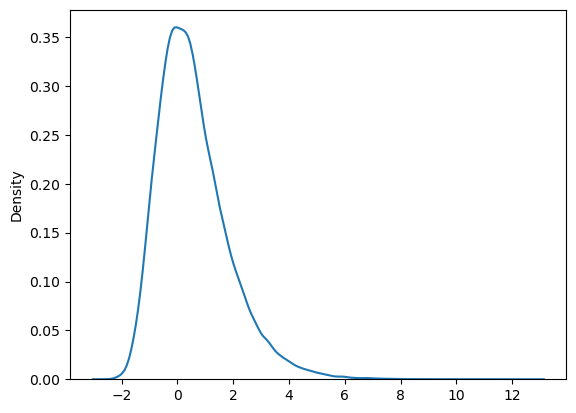

In [9]:
X = np.random.gumbel(size=100000)
sns.kdeplot(X, label="Standard Gumbel Distribution", bw_adjust=1)

<AxesSubplot:ylabel='Density'>

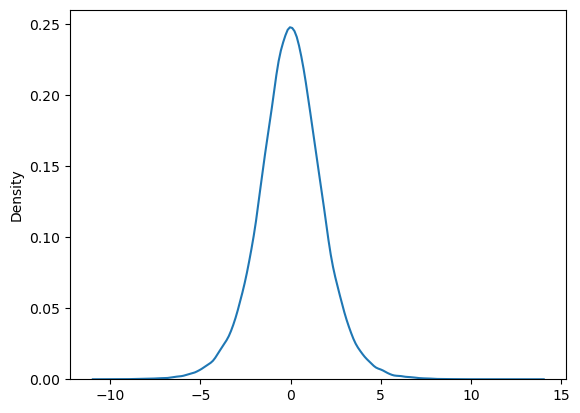

In [10]:
Y = np.random.gumbel(size=100000)
Z = X-Y

sns.kdeplot(Z, label="Logistic Distribution", bw_adjust=1)

## Multinomial Logit

An agent $i$ chooses among alternatives $j \in \mathcal{J}$. The utility derived by this agent from choosing alternative $j$ is written as follows:

\begin{align}
U_{ij} = V_{ij} + \epsilon_{ij}, \hspace{5pt} \forall j
\end{align}

Where $V$ is deterministic, a function of product characteristics (like $V$ = $X'\beta$), and $\epsilon$ is the unobserved heterogeneity.

The probability that this agent chooses $j$ rather than $k$ given $\epsilon_{ij}$ is thus:

\begin{align}
P_{ij|\epsilon} &= P(U_{ik} < U_{ij} | \epsilon_{ij} \hspace{5pt} \forall k \neq j) \\
&= P(V_{ik} + \epsilon_{ik} < V_{ij} + \epsilon_{ij} \hspace{5pt} \forall k \neq j) \\
&= P(\epsilon_{ik} < \epsilon_{ij} + V_{ij} - V_{ik} \hspace{5pt} \forall k \neq j)\\
&= F(\epsilon_{ij} + V_{ij} - V_{ik} \hspace{5pt} \forall k \neq j)\\
&= \prod_{k \neq j}e^{-e^{-{\epsilon_{ij} + V_{ij} - V_{ik}}}}
\end{align}

The next step are very algebraic, and you only need to know and be able to use the result. But it is good to rederive the results once in your life. 
Since we do not know $\epsilon_{ij}$ we need to integrate over possible values to go from $P_{ij|\epsilon}$ to $P_{ij}$.

\begin{align}
P_{ij} = \int_{-\infty}^{+\infty} \prod_{k \neq j} e^{-e^{-{\epsilon_{ij} + V_{ij} - V_{ik}}}} f(\epsilon_{ij}) d \epsilon_{ij}
\end{align}
We know that: 
\begin{align}
f(\epsilon_{ij}) = e^{-\epsilon_{ij}} e^{-e^{-\epsilon_{ij}}} = e^{-\epsilon_{ij}} e^{-e^{-\epsilon_{ij} + V_{ij} - V_{ij}}}
\end{align}

\begin{align}
P_{ij} = \int_{-\infty}^{+\infty} \Bigg(\prod_{k} e^{-e^{-{\epsilon_{ij} + V_{ij} - V_{ik}}}}\Bigg) e^{-\epsilon_{ij}} d \epsilon_{ij} \\
= \int_{-\infty}^{+\infty} \exp\Bigg( \sum_k e^{-(\epsilon_{ij} + V_{ij} - V_{ik})} \Bigg) e^{-\epsilon_{ij}} d\epsilon_{ij} \\
= \int_{-\infty}^{+\infty} \exp\Bigg( -e^{-\epsilon_{ij}} \sum_k e^{-(V_{ij} - V_{ik})} \Bigg) e^{-\epsilon_{ij}} d\epsilon_{ij} 
\end{align}

Notational trick: we define $t = e^{-\epsilon_{ij}}$: $\hspace{5pt}$ $\frac{dt}{d\epsilon_{ij}} = -e^{-\epsilon_{ij}}$, so $dt = -e^{-\epsilon_{ij}}d\epsilon_{ij}$

We rewrite this integral as being integrated over $dt$, noting that, when $\epsilon$ tended towards $+\infty$, t would tend to 0, and when $\epsilon$ tended towards $-\infty$, $t$ tended towards $\infty$.

\begin{align}
P_{ij} &= \int_{+\infty}^0 \exp \Bigg( -t \sum_k e^{-(V_{ij} - V{ik})} \Bigg) (-dt) \\
&=  \int_{0}^{+\infty} \exp \Bigg( -t \sum_k e^{-(V_{ij} - V_{ik})} \Bigg) dt
\end{align}

This expression is then relatively easy to integrate since it's based on an exponential:

\begin{align}
&= \Bigg[ \frac{\exp \Big( -t \sum_k e^{-(V_{ij} - V_{ik})} \Big)}{-\sum_k e^{-(V_{ij} - V_{ik})} } \Bigg]_0^{+\infty} \\
&= \frac{1}{\sum_k e^{-(V_{ij} - V_{ik})}} \\
&= \frac{e^{V_{ij}}}{\sum_k e^{V_{ik}}}
\end{align}


This really succint closed-form expression, which is allowed by the distributional assumption made on the vector of $\epsilon$, allows us to transform observable characteristics into choice probabilities. Based on "what we can observe" about alternative $j$, we can express the probability that an individual will choose it. How to go now from this to a regression allowing us to estimate parameters ?

### An IO application

Let us normalize the representative utility of alternative $j=0$ to $V_0 = 0$, and forget about the individual subscript for now. We can do so by interpreting $P_{j}$ as the "market share" of alternative $j$, which we denote $s_j$. These market shares are usually easily observed from the data. We will typically make the assumption that $V_j$ is linear in characteristics of $j$: $V_j = X_j'\theta + \xi_j$, where $\xi_j$ is a normally distributed error term. The question is now, how can we estimate $\theta$ ?

\begin{align}
s_j = \frac{e^{V_j}}{\sum_k e^{V_k}} \\
s_0 = \frac{e^{V_0}}{\sum_k e^{V_k}}
\end{align}

\begin{align}
\frac{s_j}{s_0} &= \frac{e^{V_j}}{e^{V_0}} = \frac{e^{V_j}}{e^0} = e^{V_j} \\
\log(s_j) - \log(s_0) &= V_j \\
\log(s_j) - \log(s_0) &= X_j'\theta + \xi_j
\end{align}

This last expression is just an OLS regression equation, that you can estimate for every alternative $j$ since you can observe $s_j$ and $X_j$ for every alternative. This model is relatively simple. In the field of empirical Industrial Organization, more subtle methods have been employed, one of which we will study tomorrow and in the masterclass (Berry Levinsohn Pakes).

Question: in IO (industrial organization), the price of alternative $j$ is often considered as one of the characteristics of alternative $j$ employed in the regression. On the left-hand-side of the regression equation: a product's market share, and on the r.h.s, the product's price. What issue can arise there ? How would you solve it ?